<a href="https://colab.research.google.com/github/ritikkumarjain/Rossmann-Store-Sales/blob/main/Rossmann_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**
Rossmann is one of the largest drugstore chains in Germany, with
operations across Europe. As of 2018, they have well over 3,900 stores in
Europe with an annual turnover of 9 billion euros. Our task is to predict the
sales for a few identified stores on a given day.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

from keras.callbacks import History
history = History()

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#train = pd.read_csv("/content/gdrive/My Drive/Dataset/train.csv")
train = pd.read_csv('/content/gdrive/My Drive/Dataset/Rossmann Store Sales/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Dataset/Rossmann Store Sales/test.csv')
store = pd.read_csv('/content/gdrive/My Drive/Dataset/Rossmann Store Sales/store.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Exploration

In [4]:
train.shape

(1017209, 9)

In [5]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
store.shape

(1115, 10)

In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
df_new = train.merge(store,on=['Store'],how='inner')
df_new.shape

(1017209, 18)

In [9]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [10]:
print("Unique number of Stores :", len(df_new["Store"].unique()))

print("Unique number of Days :", len(df_new["Date"].unique()))

print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))

Unique number of Stores : 1115
Unique number of Days : 942
Average daily sales of all stores :  5773.82


In [11]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [12]:
#Extracting Datetime features 
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),
                            "Spring",np.where(df_new["Month"].isin([6,7,8]),
                            "Summer",np.where(df_new["Month"].isin([9,10,11]),
                            "Fall",np.where(df_new["Month"].isin([12,1,2]),
"Winter","None"))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [13]:
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


#Data Visualization

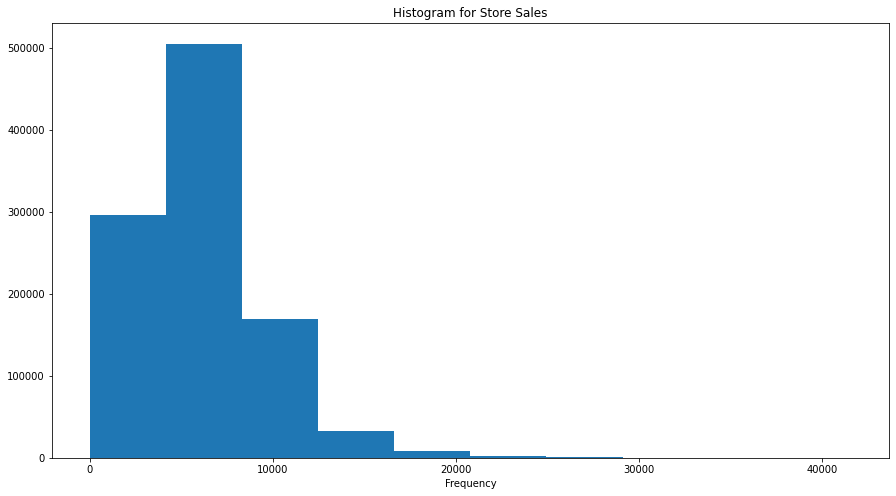

In [14]:
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

In [15]:
num_data = df_new.select_dtypes(exclude='object').columns.tolist()
num_data

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Month',
 'Quarter',
 'Year',
 'Day',
 'Week']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6e4d6b2e8>,
      dtype=object)

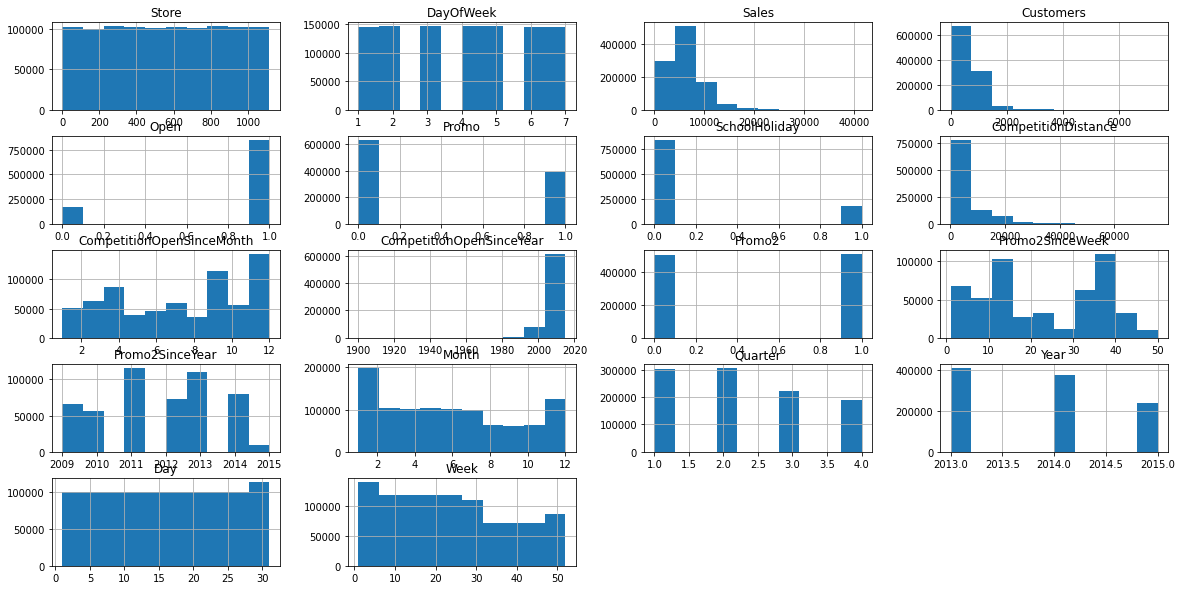

In [16]:
#Use the histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot 
#for allnumeric columns in the data
df_new[num_data].hist(figsize=(20,10))

Promo2 is well distributed between the two distinct values, whereas
Promo has more records for ‘1’ and Open has most of the store records
as ‘1’. The distribution between the values for ‘Open’ makes sense, as the
stores will be open for most days except state holidays.

We can see that the features Promo, Promo2, School
Holiday, and Open are actually binary categorical features: they represent
two possible values similar to gender: Male or Female. Therefore, these
are actually categorical features but already encoded as numeric columns.
This is great; we won’t need to further process them, as DL models
understand only numeric values.

Customer numbers range from 0 to 2,000 for most stores. A few stores
have as many as 7000 daily customers, but these are outliers and we might
need to fix them before modeling.

In [17]:
df_new.isnull().sum()/df_new.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [18]:
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])
#Double checking
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

As a rule of thumb,
if there is a loss of anything between 0% and 10%, we can make a few
attempts to fill the missing points and use the feature. But, 30% technically
becomes beyond the usable range.

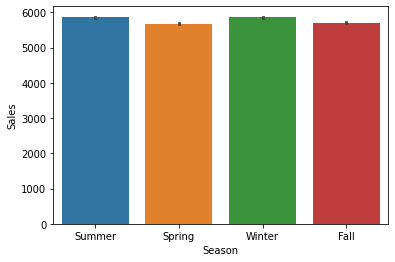

In [19]:
ax = sns.barplot(x="Season", y="Sales", data=df_new)

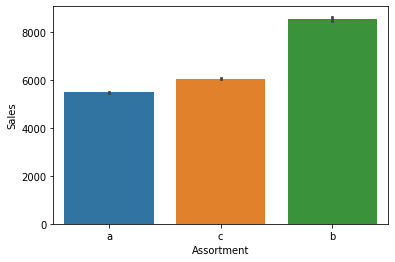

In [20]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)

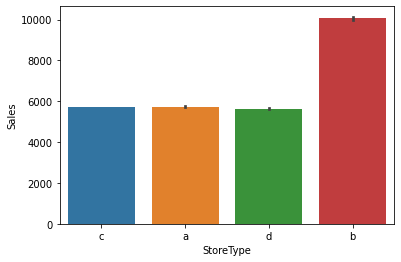

In [21]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)

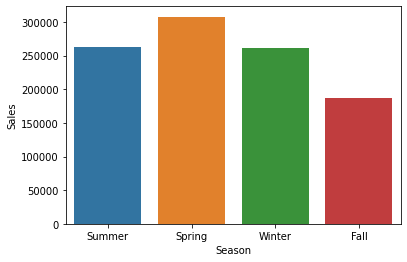

In [22]:
ax = sns.barplot(x="Season", y="Sales", data=df_new,estimator=np.size)

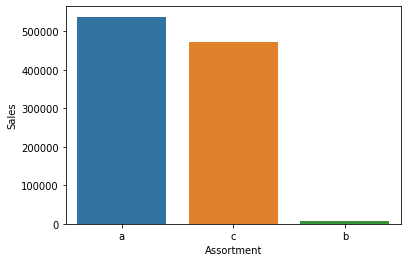

In [23]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,estimator=np.size)

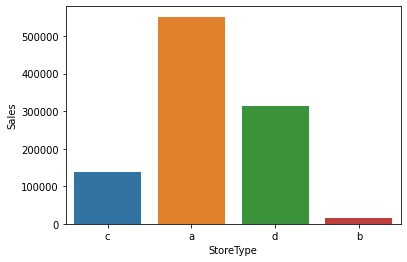

In [24]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new,estimator=np.size)

#Feature Enginnering

In [25]:
#Define a variable for each type of feature
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year","StoreType","Assortment","Season"]

In [26]:
#Define a function that will intake the raw dataframe and thecolumn name and return a one hot encoded DF
def create_ohe(df, col):
  le = LabelEncoder()
  a=le.fit_transform(df_new[col]).reshape(-1,1)
  ohe = OneHotEncoder(sparse=False)
  column_names = [col+ "_"+ str(i) for i in le.classes_]
  return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))    

In [27]:
#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
  temp_df = create_ohe(df_new,column)
  temp = pd.concat([temp,temp_df],axis=1)

In [28]:
print("Shape of Data:",temp.shape)
print("Distinct dtypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct dtypes: [dtype('int64') dtype('O') dtype('float64')]


In [29]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [30]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [31]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

#Designing the Model

In [32]:
x_train, x_test, y_train, y_test = train_test_split(temp,df_new[target],test_size=0.2,random_state=2020)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2020)

In [33]:
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


In [34]:
#basline performance
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5768.635754
dtype: float64


In [35]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2897.23844888125


In [36]:
#starting with [small+1] layer
model = Sequential([
                    layers.Dense(150,input_dim = 44,activation="relu"),
                    layers.Dense(1,activation = "linear")])

In [37]:
model.compile(optimizer='adam',loss="mean_absolute_error",metrics=["mean_absolute_error"])

model.fit(x_train.values,y_train.values,
          validation_data=(x_val,y_val),
          epochs=15,
          batch_size=64)

Epoch 1/15
11444/11444 [==============================] - 15s 1ms/step - loss: 957.2200 - mean_absolute_error: 957.2200 - val_loss: 839.8917 - val_mean_absolute_error: 839.8917
Epoch 2/15
11444/11444 [==============================] - 14s 1ms/step - loss: 788.0162 - mean_absolute_error: 788.0162 - val_loss: 750.2580 - val_mean_absolute_error: 750.2580
Epoch 3/15
11444/11444 [==============================] - 15s 1ms/step - loss: 740.8555 - mean_absolute_error: 740.8555 - val_loss: 735.4443 - val_mean_absolute_error: 735.4443
Epoch 4/15
11444/11444 [==============================] - 14s 1ms/step - loss: 722.7384 - mean_absolute_error: 722.7384 - val_loss: 717.0183 - val_mean_absolute_error: 717.0183
Epoch 5/15
11444/11444 [==============================] - 14s 1ms/step - loss: 712.3002 - mean_absolute_error: 712.3002 - val_loss: 713.2079 - val_mean_absolute_error: 713.2079
Epoch 6/15
11444/11444 [==============================] - 14s 1ms/step - loss: 704.6502 - mean_absolute_error: 704.

In [38]:
result = model.evaluate(x_test.values,y_test.values)
#Print the results
for i in range(len(model.metrics_names)):
  print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 7s 1ms/step - loss: 666.9625 - mean_absolute_error: 666.9625
Metric  loss : 666.96
Metric  mean_absolute_error : 666.96


In [39]:
#improving model
#Using [small+3] layers
model = Sequential([
                    layers.Dense(150,input_dim = 44,activation="relu"),
                    layers.Dense(150,activation="relu"),
                    layers.Dense(150,activation="relu"),
                    layers.Dense(1,activation = "linear")])

In [40]:
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model.fit(x_train,y_train,
                    validation_data=(x_val,y_val),
                    epochs=10,
                    batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 27s 2ms/step - loss: 1698491.3750 - mean_absolute_error: 847.7086 - val_loss: 1152658.0000 - val_mean_absolute_error: 728.6884
Epoch 2/10
11444/11444 [==============================] - 26s 2ms/step - loss: 1142008.6250 - mean_absolute_error: 717.8634 - val_loss: 1193266.1250 - val_mean_absolute_error: 729.6296
Epoch 3/10
11444/11444 [==============================] - 26s 2ms/step - loss: 1078503.8750 - mean_absolute_error: 697.9745 - val_loss: 1421985.7500 - val_mean_absolute_error: 785.2311
Epoch 4/10
11444/11444 [==============================] - 26s 2ms/step - loss: 1041457.3125 - mean_absolute_error: 685.5266 - val_loss: 976642.3750 - val_mean_absolute_error: 664.1721
Epoch 5/10
11444/11444 [==============================] - 26s 2ms/step - loss: 1020525.0000 - mean_absolute_error: 680.0262 - val_loss: 961763.5625 - val_mean_absolute_error: 665.3793
Epoch 6/10
11444/11444 [==============================] - 26s 2ms/step - loss

In [41]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
  print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 6s 960us/step - loss: 898015.8750 - mean_absolute_error: 638.0446
Metric  loss : 898015.88
Metric  mean_absolute_error : 638.04


In [42]:
#small + 5 layers
model = Sequential([
                    layers.Dense(150,input_dim = 44,activation="relu"),
                    layers.Dense(150,activation="relu"),
                    layers.Dense(150,activation="relu"),
                    layers.Dense(150,activation="relu"),
                    layers.Dense(150,activation="relu"),
                    layers.Dense(1,activation = "linear")])

In [43]:
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train,
          validation_data=(x_val,y_val),
          epochs=15,
          batch_size=64)

Epoch 1/15
11444/11444 [==============================] - 39s 3ms/step - loss: 1702344.6250 - mean_absolute_error: 849.7009 - val_loss: 1162534.1250 - val_mean_absolute_error: 713.7448
Epoch 2/15
11444/11444 [==============================] - 38s 3ms/step - loss: 1154800.2500 - mean_absolute_error: 721.2360 - val_loss: 1246938.0000 - val_mean_absolute_error: 741.9233
Epoch 3/15
11444/11444 [==============================] - 38s 3ms/step - loss: 1081370.3750 - mean_absolute_error: 697.0290 - val_loss: 1008584.9375 - val_mean_absolute_error: 676.4883
Epoch 4/15
11444/11444 [==============================] - 39s 3ms/step - loss: 1050220.3750 - mean_absolute_error: 686.6612 - val_loss: 961860.1875 - val_mean_absolute_error: 659.9133
Epoch 5/15
11444/11444 [==============================] - 37s 3ms/step - loss: 1027537.5000 - mean_absolute_error: 679.7642 - val_loss: 956001.6875 - val_mean_absolute_error: 655.4492
Epoch 6/15
11444/11444 [==============================] - 37s 3ms/step - loss

In [44]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
  print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 7s 1ms/step - loss: 814804.5625 - mean_absolute_error: 606.5347
Metric  loss : 814804.56
Metric  mean_absolute_error : 606.53


In [45]:
#increasing number of neurons
model = Sequential([
                    layers.Dense(350,input_dim = 44,activation="relu"),
                    layers.Dense(350,activation="relu"),
                    layers.Dense(1,activation = "linear")])

In [46]:
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, 
          validation_data=(x_val,y_val),
          epochs=20,
          batch_size=64)

Epoch 1/20
11444/11444 [==============================] - 38s 3ms/step - loss: 1679625.1250 - mean_absolute_error: 849.7300 - val_loss: 1187325.7500 - val_mean_absolute_error: 756.6290
Epoch 2/20
11444/11444 [==============================] - 39s 3ms/step - loss: 1132257.1250 - mean_absolute_error: 718.2251 - val_loss: 1113704.2500 - val_mean_absolute_error: 718.7039
Epoch 3/20
11444/11444 [==============================] - 40s 3ms/step - loss: 1077978.2500 - mean_absolute_error: 698.4597 - val_loss: 1095404.2500 - val_mean_absolute_error: 718.1939
Epoch 4/20
11444/11444 [==============================] - 38s 3ms/step - loss: 1044135.8125 - mean_absolute_error: 686.3499 - val_loss: 991955.6250 - val_mean_absolute_error: 674.8966
Epoch 5/20
11444/11444 [==============================] - 38s 3ms/step - loss: 1021189.3125 - mean_absolute_error: 678.6777 - val_loss: 980957.0000 - val_mean_absolute_error: 670.9928
Epoch 6/20
11444/11444 [==============================] - 38s 3ms/step - loss

In [47]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
  print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 7s 1ms/step - loss: 834451.7500 - mean_absolute_error: 617.2159
Metric  loss : 834451.75
Metric  mean_absolute_error : 617.22


In [48]:
model = Sequential([
                    layers.Dense(350,input_dim = 44,activation="relu"),
                    layers.Dense(350,activation="relu"),
                    layers.Dense(350,activation="relu"),
                    layers.Dense(350,activation="relu"),
                    layers.Dense(350,activation="relu"),
                    layers.Dense(1,activation = "linear")])

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, 
        validation_data=(x_val,y_val),
        epochs=20, 
        batch_size=64,
        callbacks=[history])
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
  print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/20
11444/11444 [==============================] - 104s 9ms/step - loss: 1619758.0000 - mean_absolute_error: 838.2625 - val_loss: 1317506.6250 - val_mean_absolute_error: 760.7560
Epoch 2/20
11444/11444 [==============================] - 103s 9ms/step - loss: 1165358.7500 - mean_absolute_error: 724.5025 - val_loss: 1216015.3750 - val_mean_absolute_error: 767.0186
Epoch 3/20
11444/11444 [==============================] - 106s 9ms/step - loss: 1098207.8750 - mean_absolute_error: 702.5657 - val_loss: 1075032.7500 - val_mean_absolute_error: 706.9030
Epoch 4/20
11444/11444 [==============================] - 105s 9ms/step - loss: 1065457.8750 - mean_absolute_error: 691.3068 - val_loss: 1011898.1875 - val_mean_absolute_error: 676.1394
Epoch 5/20
11444/11444 [==============================] - 104s 9ms/step - loss: 1032400.5625 - mean_absolute_error: 680.8943 - val_loss: 972256.2500 - val_mean_absolute_error: 654.0941
Epoch 6/20
11444/11444 [==============================] - 105s 9ms/step

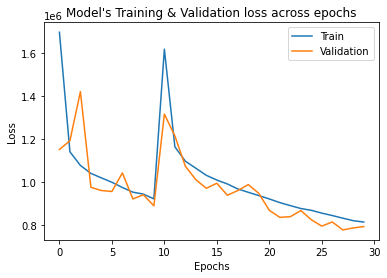

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#Model Predicitions

In [50]:
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))

        Actual Sales  Predicted Sales
700429          8116      9048.292969
418218          9960     10581.352539
633975          5965      6416.131348
220649          3381      4479.783691
882168          7792      7353.647461
682316          4886      4660.086426
676514          1839      2312.590576
830442          7424      7735.551758
494522             0         0.553743
73443           7833      6203.285156
MSE : 808198.5576723425
MAE : 595.4576292517164


In [ ]:
 '''
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
'''

In this we have explored a supervised regression problem for DNN
from end to end. We started with the problem statement and defined it
using industry standard frameworks to get an intuitive understanding of
why we are solving this problem. We then explored the data to understand
the available features and different data types. 